In [21]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv("../data/processed/clean_dataset.csv")

In [23]:
features = ["PE_Score","CU_Score","ATU_Score","AUP_Score","MIUA_Score"]
df = df.dropna(subset=features)

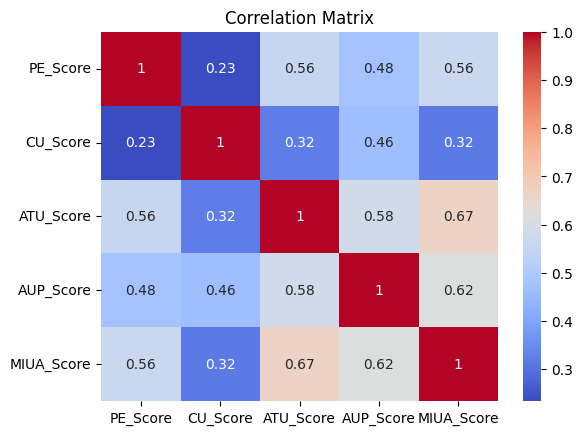

In [24]:
corr = df[features].corr(method="pearson")
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [25]:
model = smf.ols("AUP_Score ~ PE_Score + CU_Score + ATU_Score", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AUP_Score   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           1.86e-67
Time:                        21:03:34   Log-Likelihood:                -290.28
No. Observations:                 526   AIC:                             588.6
Df Residuals:                     522   BIC:                             605.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4669      0.113      4.130      0.0

In [26]:
df["High_AUP"] = np.where(df["AUP_Score"] > df["AUP_Score"].median(), 1, 0)

import statsmodels.api as sm
X = df[["PE_Score","CU_Score","ATU_Score"]]
X = sm.add_constant(X)
y = df["High_AUP"]

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.541841
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               High_AUP   No. Observations:                  526
Model:                          Logit   Df Residuals:                      522
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 Aug 2025   Pseudo R-squ.:                  0.2164
Time:                        21:03:34   Log-Likelihood:                -285.01
converged:                       True   LL-Null:                       -363.74
Covariance Type:            nonrobust   LLR p-value:                 6.468e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3647      0.850     -9.843      0.000     -10.030      -6.699
PE_Score       0.7124      0.

In [27]:
anova_table = anova_lm(model)
eta_sq = anova_table["sum_sq"] / sum(anova_table["sum_sq"])
print(eta_sq)

PE_Score     0.226411
CU_Score     0.131523
ATU_Score    0.092334
Residual     0.549732
Name: sum_sq, dtype: float64
